# Veri setinin yüklenmesi ve incelenmesi 

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("diabetes.csv")
df = df.copy()
df.dropna(inplace = True)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### bağımlı değişkenimize bakalım 


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

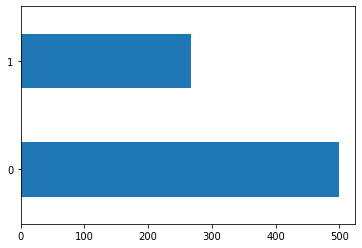

In [9]:
df.Outcome.value_counts().plot.barh();

# Bagımlı ve bağımsız değişken seçimleri 

In [10]:
y = df.Outcome

In [11]:
X = df.drop(["Outcome"] , axis = 1)

# Veri setinin Train - Test Olarak ayrılması 

In [12]:
from sklearn.model_selection import train_test_split , cross_val_score

In [13]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.30 ,random_state = 11)

In [14]:
print(X_train.shape)
print(y_train.shape)


(537, 8)
(537,)


# Model kurma 

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
cart = DecisionTreeClassifier()

In [17]:
cart_model = cart.fit(X_train ,y_train )

# Tahmin 

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = cart_model.predict(X_test)

In [27]:
accuracy_score(y_test ,y_pred)

0.70995670995671

# Formul Yapısı 

In [28]:
from skompiler import skompile

In [29]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.7054999768733978 else
    0) if x[5] <= 26.399999618530273 else 0 if x[0] <= 6.5 else 1 if x[0] <=
    8.5 else 0) if x[1] <= 137.5 else 1 if x[4] <= 32.0 else 0) if x[7] <= 
    51.5 else 1 if x[7] <= 54.5 else 0) if x[5] <= 27.34999942779541 else (
    (0 if x[3] <= 40.5 else 1 if x[4] <= 21.0 else 0 if x[1] <= 83.5 else 1
    ) if x[6] <= 0.7989999949932098 else 0 if x[0] <= 2.5 else 1) if x[1] <=
    94.5 else ((0 if x[1] <= 111.5 else (0 if x[5] <= 28.199999809265137 else
    1 if x[2] <= 55.0 else ((1 if x[1] <= 115.5 else 0) if x[1] <= 133.0 else
    1) if x[2] <= 79.0 else 1) if x[7] <= 28.5 else (1 if x[5] <= 
    28.15000057220459 else 0) if x[1] <= 139.0 else 1) if x[3] <= 5.0 else 
    (((0 if x[5] <= 31.300000190734863 else (1 if x[5] <= 
    32.000000953674316 else 0 if x[1] <= 138.5 else 1 if x[1] <= 140.5 else
    0) if x[6] <= 0.5085000097751617 else ((0 if x[3] <= 24.0 else 0 if x[4
    ] <= 32.0 else 1) if x[2]

# Model Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [31]:
?cart

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           <...> ight_fraction_leaf=0.0, presort=False,
           random_state=None, splitter='best')
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\tree\tree.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less

In [36]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth" : range(1 ,10), # max_depth ve samples_split agacdaki dallanmaları etkiler
              "min_samples_split" : list(range(2,10))}

In [37]:
cart_cv = GridSearchCV(cart,
                      cart_params,
                      cv = 10,
                      n_jobs = 10,
                      verbose = 2).fit(X_train ,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 720 out of 720 | elapsed:    3.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
cart_cv.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [40]:
cart_tuned = DecisionTreeClassifier( max_depth = 1 ,min_samples_split = 2 
                                   ).fit(X_train , y_train )

In [41]:
y_pred = cart_tuned.predict(X_test)

In [42]:
accuracy_score(y_test , y_pred)

0.7272727272727273